In [93]:
from pandas_datareader.data import DataReader
from datetime import datetime
from IPython.display import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import math
from itertools import cycle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import cufflinks as cf
from scipy.stats import kstest
from scipy.stats import mannwhitneyu
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [94]:
tech_list = ['BAC','C','GS','JPM']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(2014, 1, 1)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    variable_name = stock.replace('.NS', '')
    globals()[variable_name.lower()] = DataReader(stock, 'yahoo', start, end)

In [95]:
company_list = [bac, c, gs, jpm]

Text(0.5, 1.0, 'jpm')

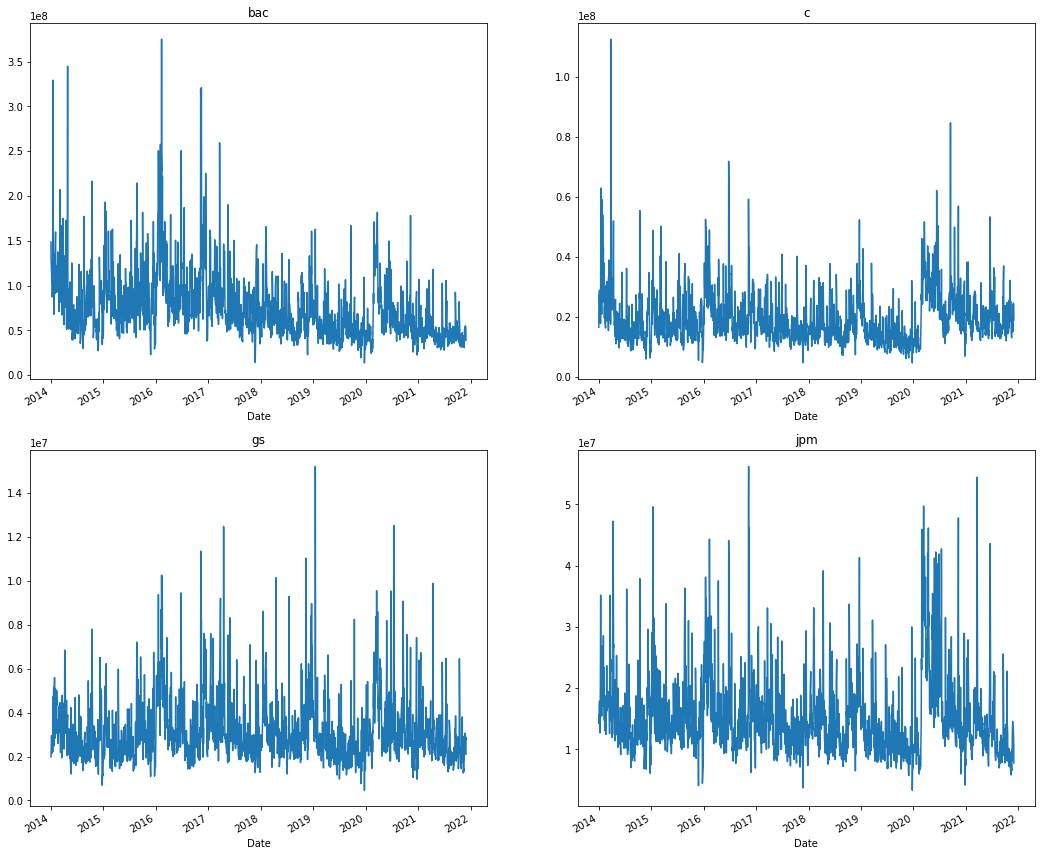

<Figure size 1080x432 with 0 Axes>

In [96]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,16))
plt.title('Closing')
plt.figure(figsize=(15, 6))
bac['Volume'].plot(ax=axes[0,0])
axes[0, 0].set_title("bac")
c['Volume'].plot(ax=axes[0,1])
axes[0, 1].set_title("c")
gs['Volume'].plot(ax=axes[1,0])
axes[1, 0].set_title("gs")
jpm['Volume'].plot(ax=axes[1,1])
axes[1, 1].set_title("jpm")

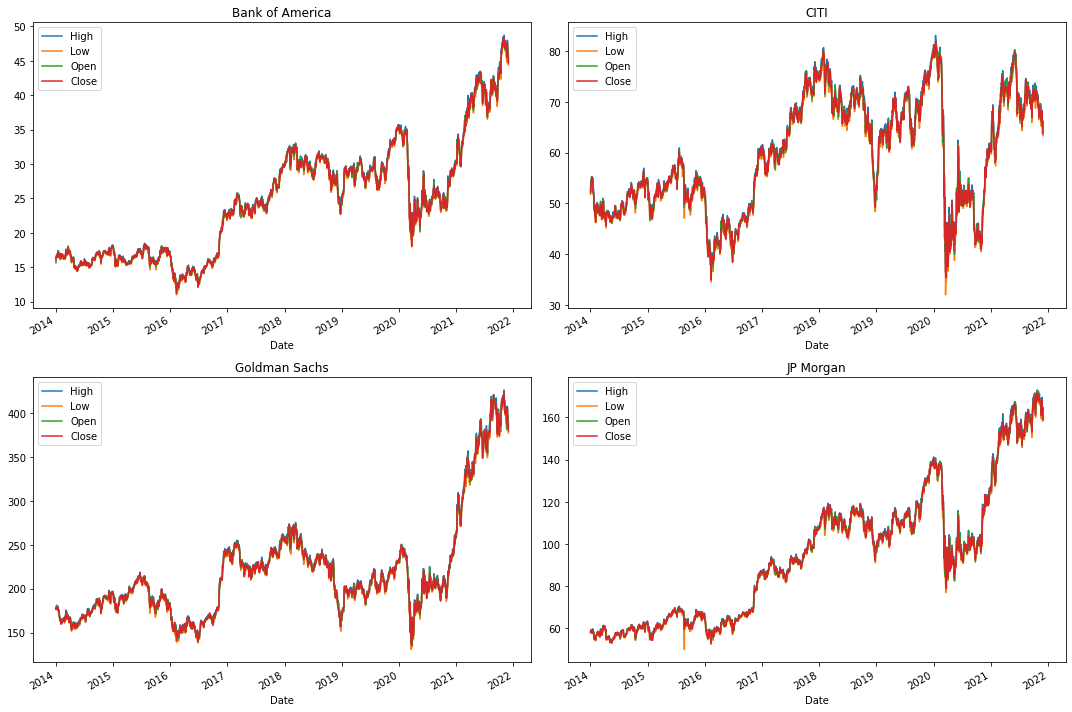

In [97]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

bac[["High", "Low", "Open", "Close"]].plot(ax=axes[0,0])
axes[0,0].set_title("Bank of America")

c[["High", "Low", "Open", "Close"]].plot(ax=axes[0,1])
axes[0,1].set_title("CITI")

gs[["High", "Low", "Open", "Close"]].plot(ax=axes[1,0])
axes[1,0].set_title('Goldman Sachs')

jpm[["High", "Low", "Open", "Close"]].plot(ax=axes[1,1])
axes[1,1].set_title("JP Morgan")

fig.tight_layout()

In [98]:
# Calculate Moving Averages for 10, 20, 50 Days

ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

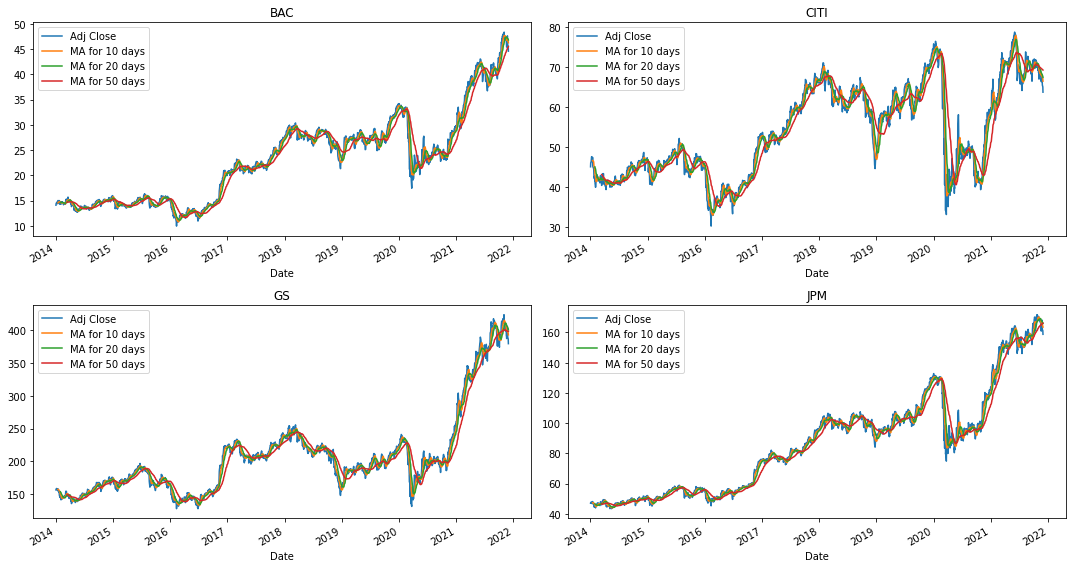

In [99]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

bac[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[0,0])
axes[0,0].set_title("BAC")

c[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[0,1])
axes[0,1].set_title("CITI")

gs[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[1,0])
axes[1,0].set_title('GS')

jpm[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[1,1])
axes[1,1].set_title("JPM")

fig.tight_layout()

In [100]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head()  

Symbols,BAC,C,GS,JPM
Date,,,,
2014-01-02,14.108598,45.126114,156.239899,47.080605
2014-01-03,14.380252,46.101654,157.352768,47.444572
2014-01-06,14.599326,46.455639,158.430389,47.719555
2014-01-07,14.459120,46.775047,157.476425,47.169571
2014-01-08,14.529226,47.318947,157.608948,47.614418


In [101]:
returns = closing_df.pct_change()
returns.head()

Symbols,BAC,C,GS,JPM
Date,,,,
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,0.019255,0.021618,0.007123,0.007731
2014-01-06,0.015234,0.007678,0.006848,0.005796
2014-01-07,-0.009604,0.006876,-0.006021,-0.011525
2014-01-08,0.004849,0.011628,0.000842,0.009431


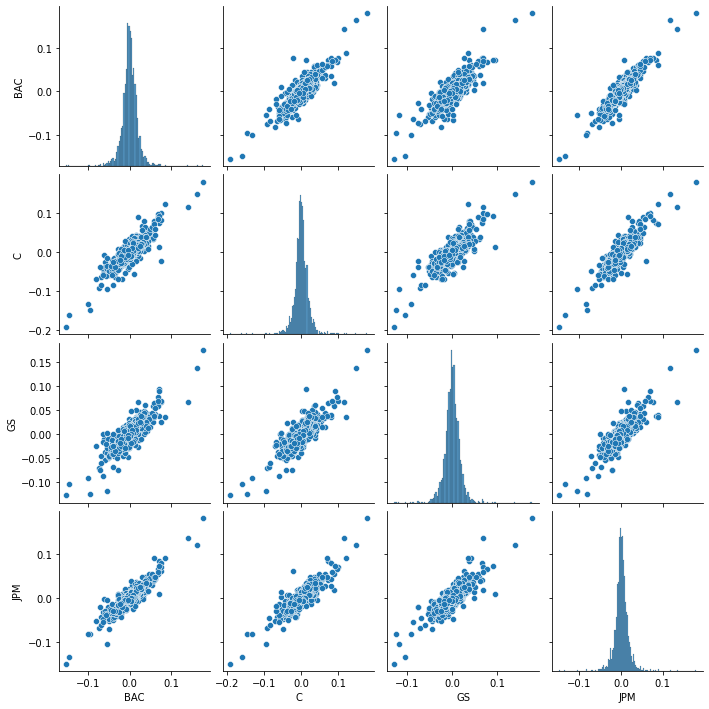

In [102]:
import seaborn as sns
sns.pairplot(returns[1:])

In [103]:
# Worst Drop
# https://www.cnbc.com/2020/03/13/stock-market-today-live.html
returns.idxmin()

Symbols
BAC   2020-03-16
C     2020-03-16
GS    2020-03-16
JPM   2020-03-16
dtype: datetime64[ns]

In [104]:
# Best Single Day Gain
# Reason - #https://www.cnbc.com/2020/03/13/stock-market-today-live.html
returns.idxmax()

Symbols
BAC   2020-03-13
C     2020-03-13
GS    2020-03-13
JPM   2020-03-13
dtype: datetime64[ns]

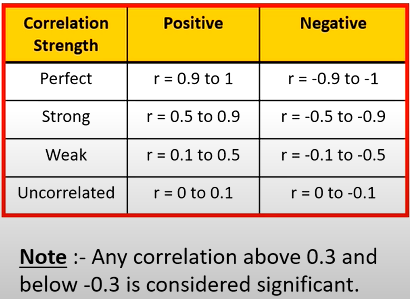

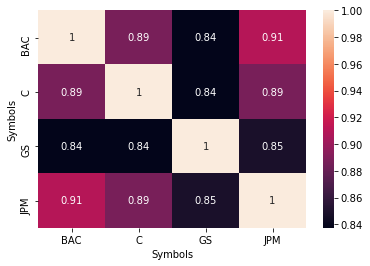

In [105]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(returns.corr(), annot=True, cmap='rocket')
Image(filename='corr.png') 

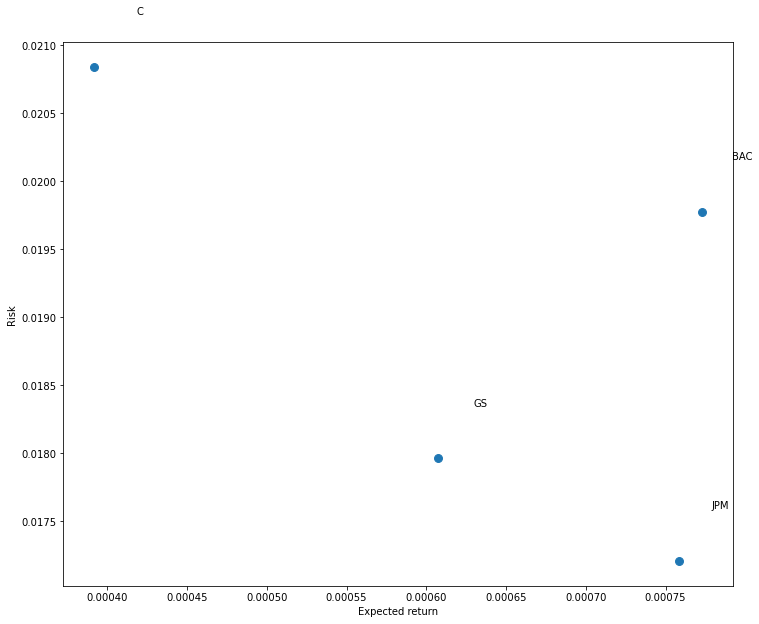

In [106]:
rets = returns.dropna()

area = np.pi * 20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom')

In [107]:
c

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2014-01-02,52.400002,51.810001,52.029999,52.270000,16479700.0,45.126099,NaN,NaN,NaN
2014-01-03,53.470001,52.310001,52.389999,53.400002,26884900.0,46.101665,NaN,NaN,NaN
2014-01-06,54.290001,53.430000,53.619999,53.810001,28503100.0,46.455620,NaN,NaN,NaN
2014-01-07,54.720001,53.779999,54.590000,54.180000,28840400.0,46.775059,NaN,NaN,NaN
2014-01-08,55.000000,54.200001,54.290001,54.810001,25989800.0,47.318954,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-11-23,68.370003,67.110001,67.570000,68.070000,18142200.0,68.070000,67.813000,68.255205,69.525473
2021-11-24,68.059998,67.230003,68.000000,67.279999,14975500.0,67.279999,67.720000,68.129000,69.472211
2021-11-26,65.739998,63.810001,65.010002,65.500000,24542000.0,65.500000,67.382999,67.885500,69.392285


In [108]:
c[['Open', 'High', 'Low', 'Close']].loc['2019-01-01':'2020-12-31'].iplot(kind='candle')

In [109]:
c['Close'].loc['2019-01-01':'2021-11-01'].ta_plot(study='boll')

In [110]:
c['Date'] = pd.to_datetime(c.index, format='%Y-%m-%d')

y_overall = c.loc[(c['Date'] >= '2014-04-01')
                     & (c['Date'] <= '2021-11-14')]

y_overall=y_overall[['Open','High','Low','Close']]
monthvise= y_overall.groupby(y_overall.index.month)[['Open','High','Low','Close']].mean()
monthvise

,Open,High,Low,Close
Date,,,,
1,62.067943,62.669503,61.316241,61.972199
2,60.828059,61.497687,60.173731,60.819851
3,58.766883,59.584870,57.837792,58.709610
4,57.070602,57.699277,56.409157,57.053855
5,58.134048,58.717143,57.565238,58.159643
6,59.064244,59.640639,58.391162,59.000698
7,59.509353,60.046235,59.010353,59.541176
8,59.840398,60.385625,59.323125,59.862216
9,59.452195,60.019695,58.848110,59.367683


In [111]:
returns.std()

Symbols
BAC    0.019779
C      0.020842
GS     0.017964
JPM    0.017208
dtype: float64

Hypothesis testing

Does covid had impact on Citi stock?? We will know it by T-Test

In [112]:
seventeen = c[c['Date'].dt.year==2017]['Close'].mean()
eighteen = c[c['Date'].dt.year==2018]['Close'].mean()
ninteen = c[c['Date'].dt.year==2019]['Close'].mean()
mean_close =pd.DataFrame ([seventeen,eighteen,ninteen] ,index= ['2017','2018','2019'],columns= ['Close Mean'])
mean_close

,Close Mean
2017,65.699522
2018,69.460518
2019,67.799762


Hypothesis:

h0 : close price 2020 >= 2019 <br>
h1 : close price 2020 < 2019 <br>
We will implement mannwhitneyu method because we will be comparing 2 variables that have non parametic values

In [113]:
a,pval = mannwhitneyu(c[c['Date'].dt.year==2020]['Close'],c[c['Date'].dt.year==2019]['Close'], alternative = 'less')

In [114]:
pval<0.05

True

Since we got True, We can reject Null Hypothesis i.e. ( Close price in 2020 is lower than Close price in 2019), Hence we can conclude covid had negative impact on closing price

Machine Learning

In [115]:
c_close = c[['Close']]
c_close = c_close[c_close.index > '2015-04-01']

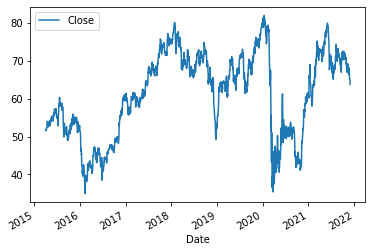

In [116]:

c_close[["Close"]].plot()
axes[0,0].set_title("CITI")
original_df = c_close.copy()

In [117]:
print("Input for prediction: ",c_close.shape[0])

Input for prediction:  1679


In [118]:
scaler=MinMaxScaler(feature_range=(0,1))
c_close=scaler.fit_transform(np.array(c_close).reshape(-1,1))
print(c_close.shape)

(1679, 1)


In [119]:
training_size=int(len(c_close)*0.85) # 85 percent train
test_size=len(c_close)-training_size
train_data,test_data=c_close[0:training_size,:],c_close[training_size:len(c_close),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1427, 1)
test_data:  (252, 1)


In [120]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [121]:


time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1411, 15)
y_train:  (1411,)
X_test:  (236, 15)
y_test (236,)


In [122]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1411, 15, 1)
X_test:  (236, 15, 1)


In [123]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [124]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
45/45 [==============================] - 1s 9ms/step - loss: 0.0609 - val_loss: 0.0040
Epoch 2/200
45/45 [==============================] - 0s 6ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 3/200
45/45 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 4/200
45/45 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 5/200
45/45 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 6/200
45/45 [==============================] - 0s 6ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 7/200
45/45 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 8/200
45/45 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 9/200
45/45 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 10/200
45/45 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 11/

45/45 [==============================] - 0s 8ms/step - loss: 6.9279e-04 - val_loss: 6.5950e-04
Epoch 81/200
45/45 [==============================] - 0s 6ms/step - loss: 7.8388e-04 - val_loss: 6.6731e-04
Epoch 82/200
45/45 [==============================] - 0s 6ms/step - loss: 7.1190e-04 - val_loss: 6.0656e-04
Epoch 83/200
45/45 [==============================] - 0s 6ms/step - loss: 7.0006e-04 - val_loss: 6.2074e-04
Epoch 84/200
45/45 [==============================] - 0s 6ms/step - loss: 6.8847e-04 - val_loss: 6.1018e-04
Epoch 85/200
45/45 [==============================] - 0s 6ms/step - loss: 6.9124e-04 - val_loss: 6.1122e-04
Epoch 86/200
45/45 [==============================] - 0s 6ms/step - loss: 6.7398e-04 - val_loss: 6.3179e-04
Epoch 87/200
45/45 [==============================] - 0s 6ms/step - loss: 7.1058e-04 - val_loss: 5.8382e-04
Epoch 88/200
45/45 [==============================] - 0s 6ms/step - loss: 6.9817e-04 - val_loss: 7.1409e-04
Epoch 89/200
45/45 [=====================

45/45 [==============================] - 0s 6ms/step - loss: 7.0072e-04 - val_loss: 6.5007e-04
Epoch 156/200
45/45 [==============================] - 0s 6ms/step - loss: 6.8545e-04 - val_loss: 5.8411e-04
Epoch 157/200
45/45 [==============================] - 0s 6ms/step - loss: 6.8992e-04 - val_loss: 6.8264e-04
Epoch 158/200
45/45 [==============================] - 0s 6ms/step - loss: 7.6056e-04 - val_loss: 5.9208e-04
Epoch 159/200
45/45 [==============================] - 0s 6ms/step - loss: 6.8044e-04 - val_loss: 6.5430e-04
Epoch 160/200
45/45 [==============================] - 0s 6ms/step - loss: 6.8456e-04 - val_loss: 6.0015e-04
Epoch 161/200
45/45 [==============================] - 0s 6ms/step - loss: 7.2403e-04 - val_loss: 9.0534e-04
Epoch 162/200
45/45 [==============================] - 0s 6ms/step - loss: 7.3814e-04 - val_loss: 9.2203e-04
Epoch 163/200
45/45 [==============================] - 0s 6ms/step - loss: 7.0829e-04 - val_loss: 5.7616e-04
Epoch 164/200
45/45 [============

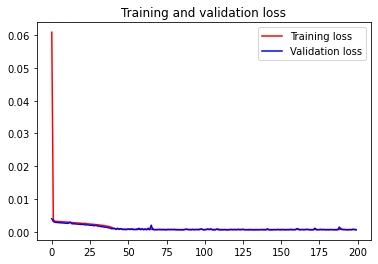

<Figure size 432x288 with 0 Axes>

In [125]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [126]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((1411, 1), (236, 1))

In [127]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [128]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1.2049899042195429
Train data MSE:  1.4520006692710232
Train data MAE:  0.8049823915088202
-------------------------------------------------------------------------------------
Test data RMSE:  1.1293087698062394
Test data MSE:  1.275338297561282
Test data MAE:  0.8829516556303378


In [129]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9884986955641617
Test data explained variance regression score: 0.9366093899176705


Train predicted data:  (1679, 1)
Test predicted data:  (1679, 1)


<AxesSubplot:xlabel='Date'>

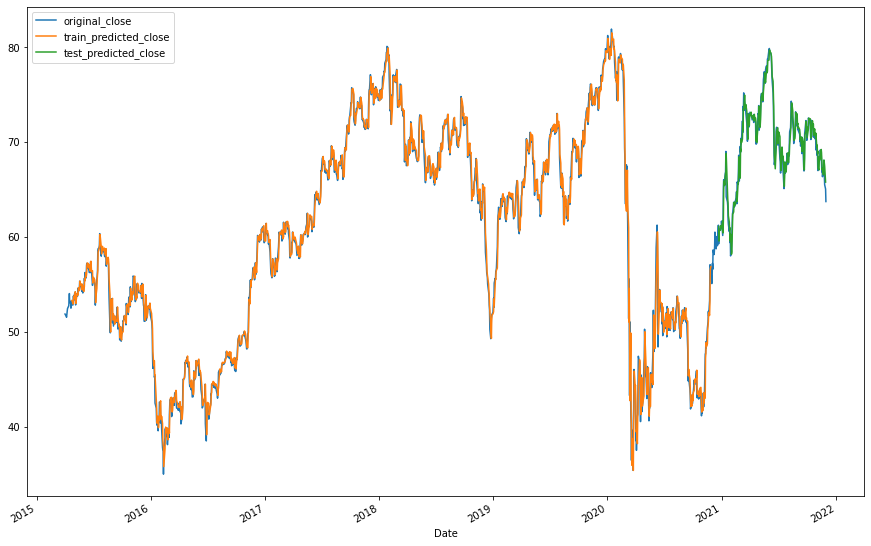

In [130]:
look_back=time_step
trainPredictPlot = np.empty_like(c_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(c_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(c_close)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({
                       'original_close': original_df['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plotdf[["original_close", "train_predicted_close", "test_predicted_close"]].plot(figsize=(15, 10))

In [131]:
len(test_data)

252

In [132]:
x_input=test_data[237:].reshape(1,-1)
x_input.shape

(1, 15)

In [133]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [134]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [135]:
len(temp_input)

15

In [141]:
# demonstrate prediction for next 15 days
from numpy import array

lst_output=[]
n_steps=15
i=0
while(i<20):
    
    if(len(temp_input)>15):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist()) #Append predicted data to lst_output
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.61678976 0.61829162 0.61993039 0.62160456 0.62332922 0.62513107
 0.62700468 0.62885714 0.63070565 0.63269764 0.63488692 0.63720185
 0.63966739 0.64215618 0.64463764]
0 day output [[0.6471202]]
1 day input [0.61829162 0.61993039 0.62160456 0.62332922 0.62513107 0.62700468
 0.62885714 0.63070565 0.63269764 0.63488692 0.63720185 0.63966739
 0.64215618 0.64463764 0.64712018]
1 day output [[0.64960545]]
2 day input [0.61993039 0.62160456 0.62332922 0.62513107 0.62700468 0.62885714
 0.63070565 0.63269764 0.63488692 0.63720185 0.63966739 0.64215618
 0.64463764 0.64712018 0.64960545]
2 day output [[0.65209514]]
3 day input [0.62160456 0.62332922 0.62513107 0.62700468 0.62885714 0.63070565
 0.63269764 0.63488692 0.63720185 0.63966739 0.64215618 0.64463764
 0.64712018 0.64960545 0.65209514]
3 day output [[0.6545895]]
4 day input [0.62332922 0.62513107 0.62700468 0.62885714 0.63070565 0.63269764
 0.63488692 0.63720185 0.63966739 0.64215618 0.64463764 0.64712018
 0.64960545 0.652095

In [142]:
day_new=np.arange(1,16)
day_pred=np.arange(16,36)

In [143]:
len(c_close)

1679

In [144]:
len(lst_output)

20

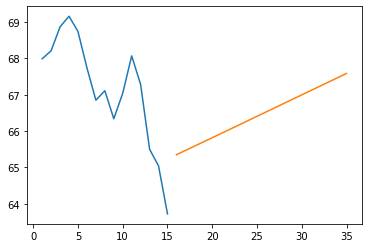

In [147]:
plt.plot(day_new,scaler.inverse_transform(c_close[1664:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=c_close.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
len(df3)